In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("Program_3a_Dataset.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

- The target variable is imbalanced
- Undersmapling or Oversampling techniques can be used to get a better analysis

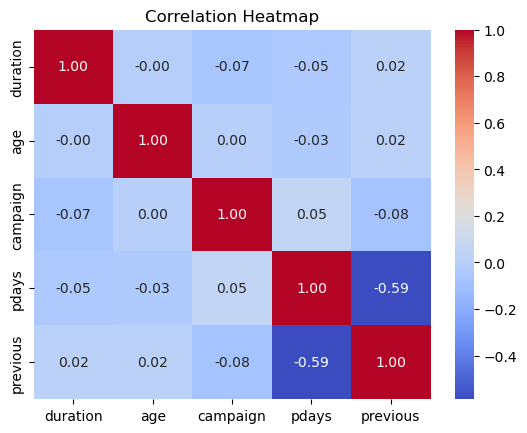

In [7]:
correlation_matrix = df[['duration', 'age', 'campaign', 'pdays','previous' ]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- The variables pdays and previous are correlated
- They might not be the best variables for prediction

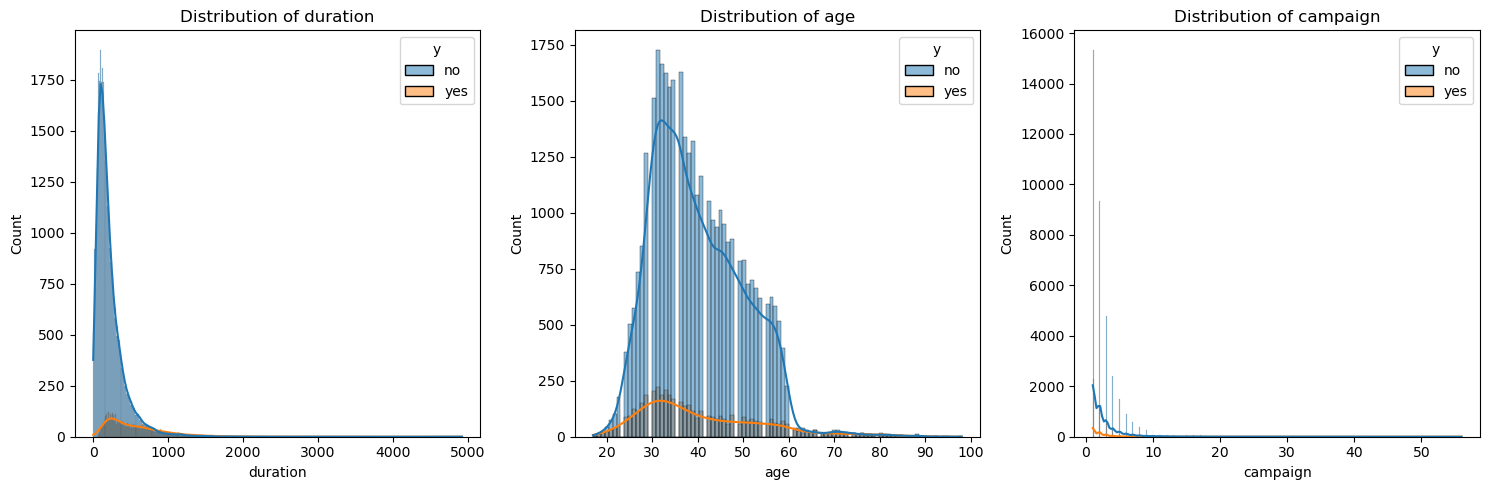

In [10]:
# Feature distribution by class
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['duration', 'age', 'campaign']):
    sns.histplot(df, x=col, hue='y', kde=True, ax=axes[i], common_norm=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
# Defining predictor and target vatiables
X = df[['duration', 'age', 'campaign']]
y = df['y']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

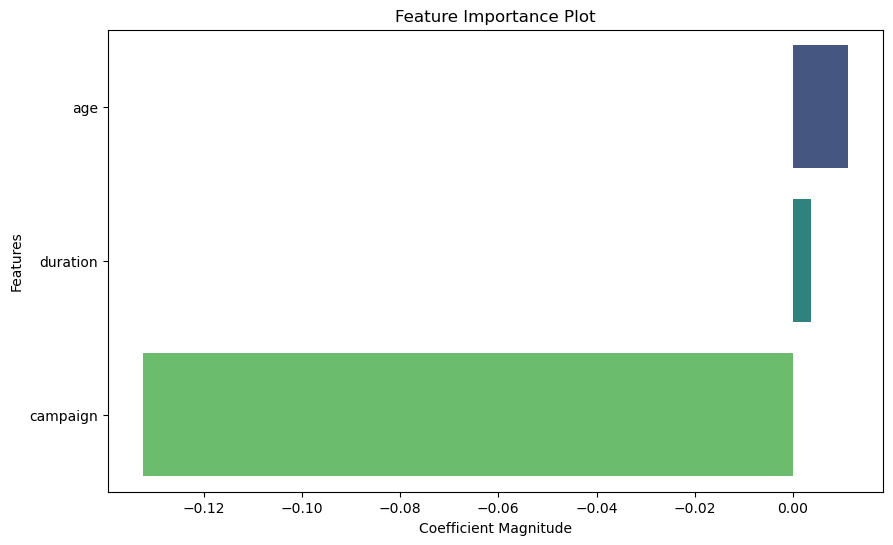

In [14]:
# Ploting feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [16]:
# Make predictions on the training set
train_predictions = model.predict(X_train)
# Make predictions on the test set
test_predictions = model.predict(X_test)

In [17]:
# Calculate classification accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display classification accuracy on both train and test sets
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.8928
Test Accuracy: 0.8950


In [18]:
# Display Classification Report
print('\nClassification Report on Test Set:')
print(classification_report(y_test, test_predictions))


Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



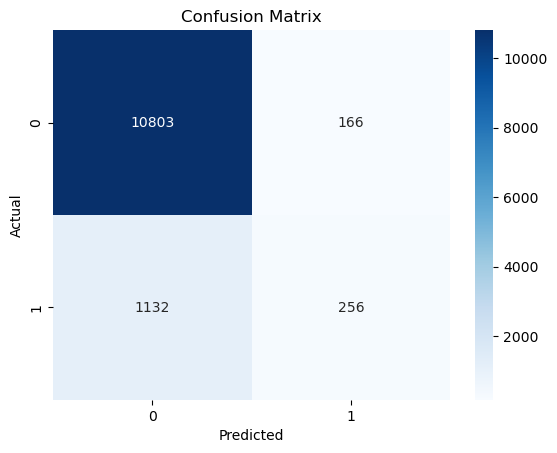

In [19]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Inference:

##### 1. Precision and Recall:

- Precision for the positive class ('yes') is 0.61, indicating that when the model predicts a positive outcome, it is correct about 61% of the time.
- Recall for the positive class is 0.18, suggesting that the model identifies only 18% of the actual positive cases.
- High precision but low recall might indicate that the model is conservative in predicting positive cases, but when it does, it's often correct.

##### 2. F1-Score:

- The F1-score is the harmonic mean of precision and recall. A low F1-score for the positive class (0.28) indicates a trade-off between precision and recall.

##### 3. Overall Accuracy:

- The overall accuracy on the test set is 0.8950, which is quite high. However, accuracy alone may not be a sufficient metric, especially in imbalanced datasets.

##### 4. Class Imbalance:

- There is a class imbalance, with 'no' being the majority class. This can impact the model's ability to predict the minority class ('yes'). The model seems to perform well on the majority class but struggles with the minority class.

##### 5. Training vs. Test Accuracy:

- The training and test accuracies are close, suggesting that the model generalizes well to new, unseen data.

##### 6. Macro and Weighted Averages:

- The macro average F1-score and weighted average F1-score are lower than the overall accuracy, which is expected in imbalanced datasets. These scores provide a more comprehensive evaluation, considering the imbalance.